# Introducción a Redes Complejas en Biología de Sistemas

## Trabajo Computacional 1

### Ejercicio 1

1) <b>Considere las tres redes de interacción de proteínas relevadas para levadura disponibles en la
página de la materia.</b> Se trata de: una red de interacciones binarias (yeast_Y2H.txt), de copertenencia
a complejos proteicos (yeast_AP-MS.txt) y obtenida de literatura (yeast_LIT.txt)
obtenidas del Yeast Interactome Database. 

In [1]:
import itertools
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from tqdm import tqdm_notebook as tqdm

In [2]:
def ldata(archive):
    """Función que facilita la carga de las redes"""
    f=open(archive)
    data=[]
    for line in f:
        line=line.strip()
        col=line.split()
        data.append(col)
    return data

In [3]:
# Cargamos las redes como listas de edges
yeast_Y2H = [tuple(i) for i in ldata(".\\tc01_data\\yeast_Y2H.txt")]
yeast_AP_MS = ldata(".\\tc01_data\\yeast_AP-MS.txt")
yeast_LIT = ldata(".\\tc01_data\\yeast_LIT.txt")

In [4]:
#Convertimos esas listas en grafos
G_Y2H = nx.Graph()
G_Y2H.add_edges_from(yeast_Y2H)
G_AP_MS = nx.Graph()
G_AP_MS.add_edges_from(yeast_AP_MS)
G_LIT = nx.Graph()
G_LIT.add_edges_from(yeast_LIT)

a. Presente una comparación gráfica de las 3 redes.

Mostramos las tres redes completas


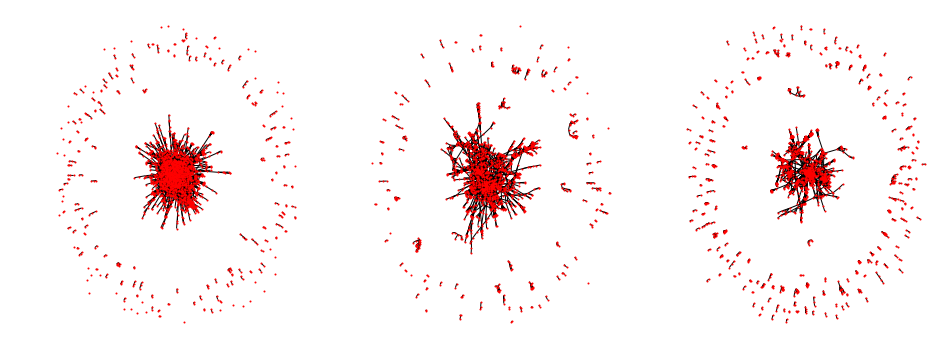

In [5]:
plt.rcParams['figure.figsize'] = (16,6)
print('Mostramos las tres redes completas')

#Graficamos las redes completas
plt.subplot(131)
nx.draw(G_Y2H, node_size=1)
plt.subplot(132)
nx.draw(G_LIT, node_size=1)
plt.subplot(133)
nx.draw(G_AP_MS, node_size=1)

plt.show()

Vemos acá la componente gigante de cada red


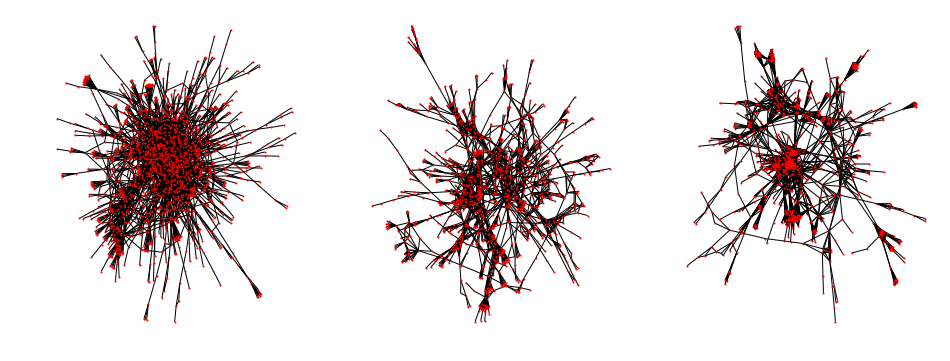

In [6]:
#Graficamos las componentes gigantes
print('Vemos acá la componente gigante de cada red')

plt.subplot(131)
nx.draw(G_Y2H.subgraph(sorted(nx.connected_components(G_Y2H),key=lambda x:len(x))[-1]), node_size=1)
plt.subplot(132)
nx.draw(G_LIT.subgraph(sorted(nx.connected_components(G_LIT),key=lambda x:len(x))[-1]), node_size=1)
plt.subplot(133)
nx.draw(G_AP_MS.subgraph(sorted(nx.connected_components(G_AP_MS),key=lambda x:len(x))[-1]), node_size=1)

plt.show()

b. Resuma en una tabla las siguientes características de dichas redes
i. El número total de nodos, N
ii. El número total de enlaces L, de la red
iii. Si se trata de una red dirigida o no-dirigida
iv. El grado medio <k> (<kin><kout>en caso de red dirigida), el grado máximo y
mínimo de la red
v. La densidad de la red
vi. Los coeficientes de clustering <Ci> y CΔ de la red.
vii. Diámetro de la red. 

In [7]:
lista = []
for G in tqdm([G_Y2H,G_AP_MS,G_LIT]):
    grafo = {}
    grafo["Nodos"] = nx.number_of_nodes(G)
    grafo["Aristas"] = nx.number_of_edges(G)
    grafo["Dirigido"] = "No"
    grafo["Gradomin"] = min(dict(nx.degree(G)).values())
    grafo["Gradomax"] = max(dict(nx.degree(G)).values())
    grafo["Gradomedio"] = round(np.mean(list(dict(nx.degree(G)).values())),3)
    grafo["Density"] = round(nx.density(G),3)
    grafo["Clustering"] = nx.average_clustering(G)
    grafo["Transitividad"] = nx.transitivity(G)
    grafo["Diametro"] = nx.diameter(G.subgraph(sorted(nx.connected_components(G),key=lambda x:len(x))[-1]))
    lista.append(grafo)

In [8]:
df = pd.DataFrame(lista, index=["Y2H","AP_MS","LIT"])
df

,Aristas,Clustering,Density,Diametro,Dirigido,Gradomax,Gradomedio,Gradomin,Nodos,Transitividad
Y2H,2930,0.046194,0.001,14,No,91,2.904,1,2018,0.023614
AP_MS,9070,0.554636,0.007,15,No,127,11.184,1,1622,0.618590
LIT,2925,0.292492,0.002,19,No,40,3.809,1,1536,0.346193


c. Teniendo en cuenta la naturaleza de las interacciones reportadas, diga si es razonable lo
que encuentra para ciertos observables calculados.

Las conexiones en la red Y2H se establecen por interacción directa de a pares mediante experimentos de doble híbrido, por lo que las tomamos como conexiones directas reales.<br>
La red AP_MS, por su parte, viene de inmunoprecipitar complejos proteicos en los que la conectividad real de a pares es desconocida. Por lo tanto, no sorprende que el número de aristas sea mayor ni que la distribución de grados esté corrida a valores más altos, lo que redunda en que tanto el grado medio como el grado máximo sean mayores que en el Y2H.<br>
Por último, las redes obtenidas a partir de literatura probablemente sobreestimen las conexiones físicas, puesto que la interacción directa no es el único caso en el cual dos proteínas puedan aparecer consistentemente en la misma literatura (por ejemplo, dos proteínas pueden interactuar con el mismo metabolito y no directamente entre ellas).<br>Todos los parámetros responden a las tendencias expuestas.

d. Estudiar la conectividad local en la red AP_MS. Justificar si la misma fue construida:
<ol>
    <li>Uniendo la proteína target con todas las coinmunoprecipitadas.</li>
    <li>Conectando todas las proteínas de los complejos obtenidos en forma de cliqué.</li>

Como primer enfoque graficamos un histograma del grado de cada nodo en la red en cuestión

In [9]:
import collections
degree_sequence_AP_MS = np.array(sorted([d for n, d in G_AP_MS.degree()], reverse=True))  # degree sequence
degree_sequence_Y2H = np.array(sorted([d for n, d in G_Y2H.degree()], reverse=True))  # degree sequence
degree_sequence_LIT = np.array(sorted([d for n, d in G_LIT.degree()], reverse=True))  # degree sequence

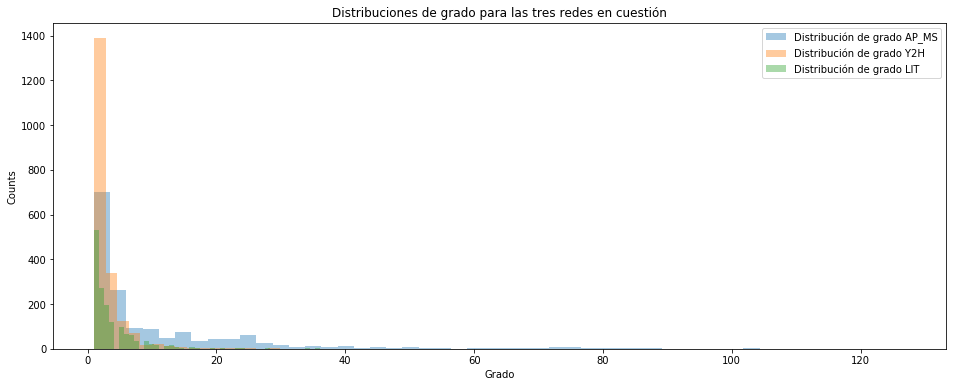

In [12]:
plt.rcParams['figure.figsize'] = (16,6)

sns.distplot(degree_sequence_AP_MS, label="Distribución de grado AP_MS", bins=50, kde=False, norm_hist=False)#, shade=True)
sns.distplot(degree_sequence_Y2H, label="Distribución de grado Y2H", bins=50, kde=False, norm_hist=False)#, shade=True)
sns.distplot(degree_sequence_LIT, label="Distribución de grado LIT", bins=50, kde=False, norm_hist=False)#, shade=True)

plt.title('Distribuciones de grado para las tres redes en cuestión')
plt.xlabel("Grado")
plt.ylabel("Counts")
plt.legend()
plt.show()

Vemos que la distribución de grado de la red AP_MS tiene una cola más pesada, teniendo muchos nodos de grado más alto que las otras dos. Esto en principio nos hace sospechar que la red pudo haber sido construida conectando en forma de cliqué los complejos inmunoprecipitados a partir de una proteína target (caso 2 en la consigna).

Para poner a prueba esta hipótesis de un modo más elegante, se procedió a simular el panorama proteico de las células de levadura tomando ciertos parámetros de literatura, a fin de simular posteriormente los experimentos de pull-down y el armado de los dos tipos de red propuestos.

Se creó una función (Complex_gen) que toma como parámetro el número de proteínas totales a simular y genera complejos al azar con una cantidad de proteínas que sigue una distribución normal con media 11 y varianza 3 (datos sacados de bibliografía).

In [13]:
#Simulamos complejos proteicos a partir de la misma cantidad de nodos que la red que queremos someter a prueba
def Complex_gen(n):
    """Simula complejos a partir de n proteínas. El tamaño de los complejos sigue una distribución normal con media 11 y 
    varianza 3, aproximada del paper https://www.sciencedirect.com/science/article/pii/S0092867412010069#figs4"""
    #Abrimos una lista que va a contener a todos los grafos, cuyos nodos pueden superponerse
    Complex_list = []
    Different_nodes = set()
    Nodes_sim = [i for i in range(n)]
    #Agregamos complejos hasta que todos los nodos de la red original participan en al menos 1
    while len(Different_nodes) < 3200:
        try:
        
            #El tamaño de los complejos sigue una distribución normal de media 7 y varianza 2, aproximada a partir del paper citado
            #abajo
            Complex_size = int(np.abs(np.random.normal(11,3)))
        
            #Se genera un complejo con el tamaño mencionado, que posea una conexión al azar y un par de conexiones más que de nodos
            #para que la probabilidad de nodos sueltos sea baja
            Complex_nodes = [Nodes_sim[int(np.random.uniform(0,len(Nodes_sim)))] for i in range(Complex_size)]
            Complex = nx.dense_gnm_random_graph(Complex_size, int(np.random.uniform(Complex_size+2,Complex_size+4)))
        
            #Renombramos los nodos del complejo para llevar cuenta de qué proteínas tiene
            map_dict = {i:j for i,j in enumerate(Complex_nodes)}
            nx.relabel_nodes(Complex, map_dict, copy=False)
        
            #Por si algún nodo quedó suelto, nos quedamos con la componente gigante del grafo que representa al complejo proteico
            Complex = Complex.subgraph(sorted(nx.connected_components(Complex),key=lambda x:len(x))[-1])
            Complex_list.append(Complex)
    
            #Por último, llevamos cuenta de qué nodos fueron ya usados, a fin de terminar el loop cuando todos aparezcan en al menos
            #un complejo.
            Different_nodes.update([i for i in Complex.nodes()])

        except IndexError:
            continue
            
    return Complex_list

Se procedió entonces a simular el experimento de pull-down utilizando una cierta cantidad k de anticuerpos, y conectando los complejos precipitados (todos aquellos en los que la proteína que se une al anticuerpo en cuestión está presente) de las dos maneras a estudiar:

<ol>
  <li>Conectando sólo la proteína target con las coinmunoprecipitadas</li>
  <li>En forma de cliqué</li>
</ol>

Se simularon 100 experimentos con cada una de las conectividades bajo estudio, y de cada una de las redes obtenidas se llevó cuenta de:<br><br>
<li>La densidad
<li>El grado medio
<li>La asortatividad

<b>AVISO: las simulaciones tardan un ratito en correr. Se agregó una barra de estado tqdm para que el usuario no se vuelva loco esperando

In [14]:
#Simulamos el experimento de Pull-down con 800 anticuerpos
n=800

In [15]:
#Simulamos el caso de todos contra todos (conectividad cliqué) 100 veces, y guardamos las densidades, los coeficientes de clustering y
#las asortatividades calculadas.
Cluster_allvsall = []
Nodes_sim = [i for i in range(n)]

for i in tqdm(range(100)):
    Complex_list = Complex_gen(10000)
    Anticuerpos = [Nodes_sim[int(np.random.uniform(0,len(Nodes_sim)))] for i in range(n)]
    Grafo_allvsall = nx.Graph()
    Edges = []
    for Ab in Anticuerpos:
        for complejo in Complex_list:
            c = [i for i in complejo.nodes()]
            if Ab in c:
                Edges += [i for i in itertools.combinations(c,2)]
    Grafo_allvsall.add_edges_from(Edges)
    Cluster_allvsall.append([round(np.mean(list(dict(nx.degree(Grafo_allvsall)).values())),3), nx.density(Grafo_allvsall), nx.assortativity.degree_assortativity_coefficient(Grafo_allvsall)])

In [16]:
#Simulamos el caso de uno contra todos 100 veces, y guardamos las densidades, los coeficientes de clustering y 
#las asortatividades calculadas.
Cluster_1vsall = []

for i in tqdm(range(100)):
    Complex_list = Complex_gen(10000)
    Anticuerpos = [Nodes_sim[int(np.random.uniform(0,len(Nodes_sim)))] for i in range(n)]
    Grafo_1vsall = nx.Graph()
    Edges = []
    for Ab in Anticuerpos:
        for complejo in Complex_list:
            c = [i for i in complejo.nodes()]
            if Ab in c:
                Edges += [i for i in itertools.combinations(c,2) if Ab in i]
    Grafo_1vsall.add_edges_from(Edges)
    Cluster_1vsall.append([round(np.mean(list(dict(nx.degree(Grafo_1vsall)).values())),3), nx.density(Grafo_1vsall), nx.assortativity.degree_assortativity_coefficient(Grafo_1vsall)])

Ejemplo de redes simuladas. Izquierda: 1 versus all; derecha: all versus all


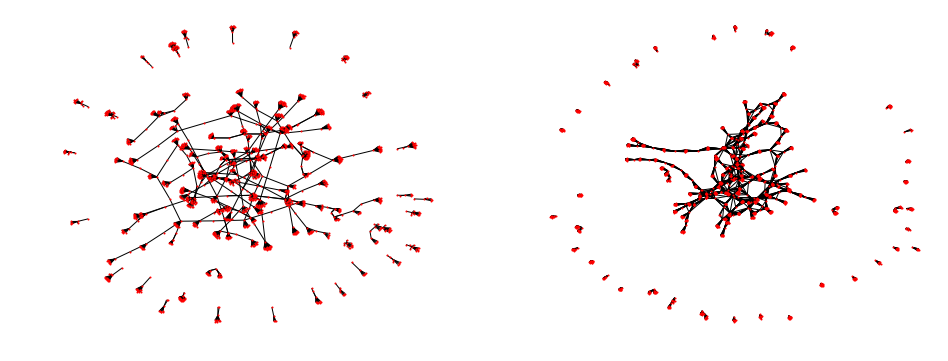

In [17]:
#Graficamos un ejemplo de cada red
print('Ejemplo de redes simuladas. Izquierda: 1 versus all; derecha: all versus all')

plt.rcParams['figure.figsize'] = (16,6)

plt.subplot(121)
nx.draw(Grafo_1vsall, node_size=1)

plt.subplot(122)
nx.draw(Grafo_allvsall, node_size=1)

plt.show()

Componentes gigantes de los ejemplos arriba mostrados


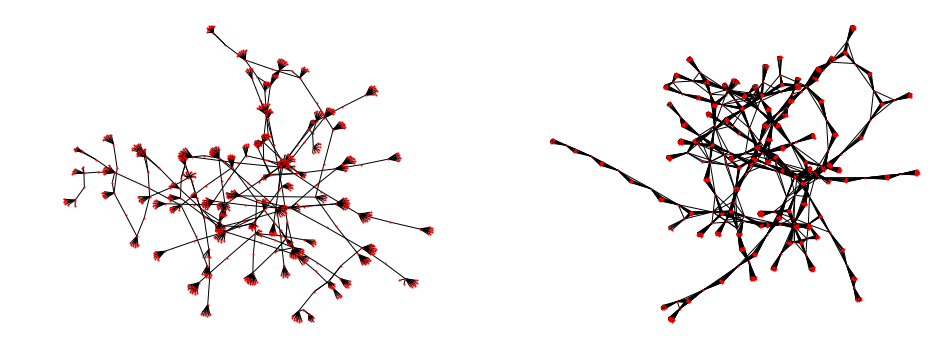

In [18]:
#Graficamos la componente gigante de cada red, para una visión más clara
print('Componentes gigantes de los ejemplos arriba mostrados')

plt.subplot(121)
nx.draw(Grafo_1vsall.subgraph(sorted(nx.connected_components(Grafo_1vsall),key=lambda x:len(x))[-1]), node_size=1)

plt.subplot(122)
nx.draw(Grafo_allvsall.subgraph(sorted(nx.connected_components(Grafo_allvsall),key=lambda x:len(x))[-1]), node_size=1)

plt.show()

In [19]:
#Graficamos las distribuciones de clustering y transitividad, en una sola dimensión
print('Nodos en ejemplo 1 vs all: '+str(len(Grafo_1vsall.nodes())))
print('Nodos en ejemplo all vs all: '+str(len(Grafo_allvsall.nodes())))
print()
print('Grado medio medio 1 vs all: '+str(np.round(np.mean(np.array([i[0] for i in Cluster_1vsall])),3)))
print('Grado medio medio all vs all: '+str(np.round(np.mean(np.array([i[0] for i in Cluster_allvsall])),3)))
print()
print('Asortatividad de Newman media 1 versus all: '+str(np.round(np.mean(np.array([i[2] for i in Cluster_1vsall])),3)))
print('Asortatividad de Newman media all versus all: '+str(np.round(np.mean(np.array([i[2] for i in Cluster_allvsall])),3)))

Nodos en ejemplo 1 vs all: 1457
Nodos en ejemplo all vs all: 1404

Grado medio medio 1 vs all: 2.489
Grado medio medio all vs all: 11.016

Asortatividad de Newman media 1 versus all: -0.591
Asortatividad de Newman media all versus all: 0.227


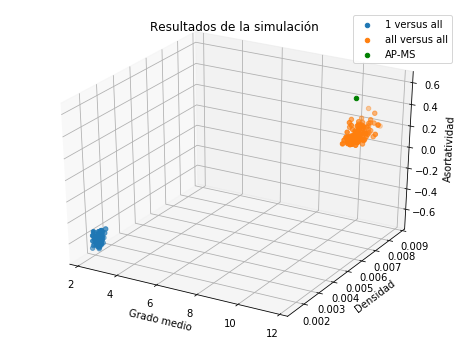

In [20]:
plt.rcParams['figure.figsize'] = (8,6)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter([i[0] for i in Cluster_1vsall],[i[1] for i in Cluster_1vsall],[i[2] for i in Cluster_1vsall], label='1 versus all')
ax.scatter([i[0] for i in Cluster_allvsall],[i[1] for i in Cluster_allvsall],[i[2] for i in Cluster_allvsall], label='all versus all')
ax.scatter(round(np.mean(list(dict(nx.degree(G_AP_MS)).values())),3),nx.density(G_AP_MS), nx.assortativity.degree_assortativity_coefficient(G_AP_MS), label='AP-MS', c='green')

plt.title('Resultados de la simulación')
ax.set_xlabel('Grado medio')
ax.set_ylabel('Densidad')
ax.set_zlabel('Asortatividad')
plt.legend()
plt.show()

<b> Conclusiones

<b> El enfoque utilizado permitió determinar que la red AP_MS (en verde en la figura de arriba) es producto de la conexión como cliqué de los complejos proteicos coinmunoprecipitados con las proteínas target.

Se observa en la figura de arriba que en cada uno de los casos las redes simuladas se comportan en forma muy distinta para las tres variables estudiadas:<br>
<ol>
<li> Como era de esperar, las redes en las que los complejos fueron tratados como cliqués tienen en promedio más conexiones que sus contrapartes, por lo que su densidad es mayor.<br>
<li> Cuando los complejos están conectados en forma de cliqué, es de esperar que su tamaño medio se asemeje al grado medio de la red. Esto podría variar teniendo en cuenta la conectividad entre complejos (proveniente de proteínas que forman más de uno). Las otras redes, en contraparte, tienen un grado medio mucho menor.<br>
<li> El caso en el que los complejos se conectan en forma de cliqué suele ser es un ejemplo de red asortativa, ya que los vecinos de un determinado nodo suelen estar conectados entre sí. Esto redunda en que nodos de alto grado suelan conectarse con nodos de alto grado, dando coeficientes de Newman positivos.<br>
<li> El caso en el que los complejos son conectados como racimos desde la proteína target del anticuerpo es un ejemplo de red disortativa, puesto que los vecinos de un determinado nodo no suelen estar conectados entre sí. Esto redunda en que nodos de alto grado suelan conectarse con nodos de bajo grado, dando como resultado coeficientes de Newman con signo negativo.

Para ilustrar las limitaciones del enfoque empleado, se procedió a desarmar tanto AP_MS como un ejemplo de cada una de las conectividades mencionadas, removiendo:
<li> Los nodos de mayor a menor grado
<li> Los nodos de menor a mayor grado

In [21]:
#Desarmamos comenzando por los nodos de mayor grado
cc = G_AP_MS.subgraph(sorted(nx.connected_components(G_AP_MS),key=lambda x:len(x))[-1])
cc_1vsall = Grafo_1vsall.subgraph(sorted(nx.connected_components(Grafo_1vsall),key=lambda x:len(x))[-1])
cc_allvsall = Grafo_allvsall.subgraph(sorted(nx.connected_components(Grafo_allvsall),key=lambda x:len(x))[-1])
grado_max_ms = sorted( list(nx.degree( cc )) ,key=lambda x:x[1],reverse=True )
grado_min_ms = sorted( list(nx.degree( cc )) ,key=lambda x:x[1])

grado_max_1vsall = sorted( list(nx.degree( cc_1vsall )) ,key=lambda x:x[1],reverse=True )
grado_min_1vsall = sorted( list(nx.degree( cc_1vsall )) ,key=lambda x:x[1])

grado_max_allvsall = sorted( list(nx.degree( cc_allvsall )) ,key=lambda x:x[1],reverse=True )
grado_min_allvsall = sorted( list(nx.degree( cc_allvsall )) ,key=lambda x:x[1])

In [22]:
G = cc.copy()
G_1 = cc_1vsall.copy()
G_all = cc_allvsall.copy()

connected_list_max = []
connected_list_max_1vsall = []
connected_list_max_allvsall = []
for node,node1,nodeall in zip(grado_max_ms,grado_max_1vsall,grado_max_allvsall):
    G.remove_node(node[0])
    G_1.remove_node(node1[0])
    G_all.remove_node(nodeall[0])
    
    connected_list_max.append( sorted( nx.connected_components(G),key= lambda x:len(x),reverse=True) )
    connected_list_max_1vsall.append( sorted( nx.connected_components(G_1),key= lambda x:len(x),reverse=True) )
    connected_list_max_allvsall.append( sorted( nx.connected_components(G_all),key= lambda x:len(x),reverse=True) )

connected_sizes_max = [len(x[0]) for x in connected_list_max if x]
connected_sizes_max_1 = [len(x[0]) for x in connected_list_max_1vsall if x]
connected_sizes_max_all = [len(x[0]) for x in connected_list_max_allvsall if x]

In [23]:
G = cc.copy()
G_1 = cc_1vsall.copy()
G_all = cc_allvsall.copy()

connected_list_min = []
connected_list_min_1vsall = []
connected_list_min_allvsall = []
for node,node1,nodeall in zip(grado_min_ms,grado_min_1vsall,grado_min_allvsall):
    G.remove_node(node[0])
    G_1.remove_node(node1[0])
    G_all.remove_node(nodeall[0])
    
    connected_list_min.append( sorted( nx.connected_components(G),key= lambda x:len(x),reverse=True) )
    connected_list_min_1vsall.append( sorted( nx.connected_components(G_1),key= lambda x:len(x),reverse=True) )
    connected_list_min_allvsall.append( sorted( nx.connected_components(G_all),key= lambda x:len(x),reverse=True) )

connected_sizes_min = [len(x[0]) for x in connected_list_min if x]
connected_sizes_min_1 = [len(x[0]) for x in connected_list_min_1vsall if x]
connected_sizes_min_all = [len(x[0]) for x in connected_list_min_allvsall if x]

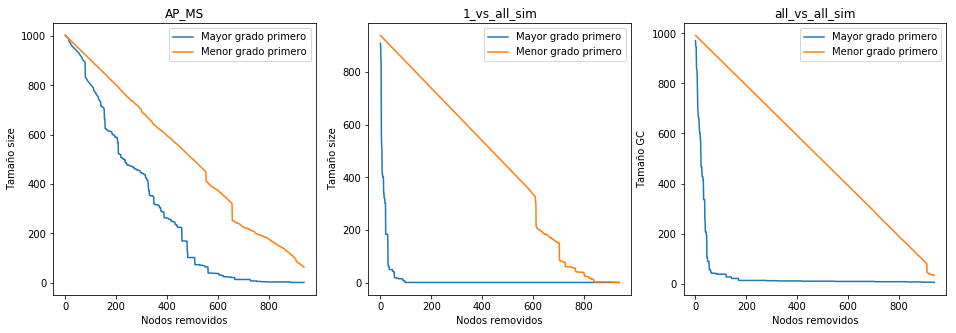

In [24]:
plt.rcParams['figure.figsize'] = (16,5)

plt.subplot(131)
plt.plot(connected_sizes_max, label='Mayor grado primero')
plt.plot(connected_sizes_min, label='Menor grado primero')
plt.title('AP_MS')
plt.xlabel("Nodos removidos")
plt.ylabel("Tamaño size")
plt.legend()

plt.subplot(132)
plt.plot(connected_sizes_max_1, label='Mayor grado primero')
plt.plot(connected_sizes_min_1, label='Menor grado primero')
plt.title('1_vs_all_sim')
plt.xlabel("Nodos removidos")
plt.ylabel("Tamaño size")
plt.legend()

plt.subplot(133)
plt.plot(connected_sizes_max_all, label='Mayor grado primero')
plt.plot(connected_sizes_min_all, label='Menor grado primero')
plt.title('all_vs_all_sim')
plt.xlabel("Nodos removidos")
plt.ylabel("Tamaño GC")
plt.legend()

plt.show()

Si bien el comportamiento al quitar primero los nodos de menor grado es similar, las redes simuladas toleran mucho menos la remoción de nodos de mayor grado que la red real.

Se debe tener en cuenta entonces, que:

<ol>
    <li>Los parámetros de las simulaciones empleadas pueden no reflejar las variables reales en el modelo de estudio.
    <li>La conectividad de los complejos proteicos en las simulaciones es azarosa, mientras que en la naturaleza es producto de millones de años de evolución.
    <li>La elección de anticuerpos utilizada en las simulaciones es producto del azar, mientras que los experimentos reales están guiados por el interés particular de quién los lleva a cabo, lo que puede redundar en el enriquecimiento de vías metabólicas o complejos proteicos particulares.